In [2]:
#Final Assighnment Intro To Data-Science
#Part-2: Python
#Name: Israel Yaacobovich
#ID: 212403679

In [3]:
#1

In [1]:
def conver(n):
    a = n
    
    digits = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    bin = ""
    while n > 0:
        bin = digits[n%2] + bin
        n //= 2
    n = a    
    
    oct = ""
    while n > 0:
        oct = digits[n%8] + oct
        n //= 8
    n = a    
    
    hex = ""
    while n > 0:
        hex = digits[n%16] + hex
        n //= 16
        
    print("bace2: " + bin)    
    print("bace8: " + oct)
    print("bace16: " + hex)

In [2]:
conver(10)

bace2: 1010
bace8: 12
bace16: A


In [3]:
#2

In [4]:
import pandas as pd
df = pd.read_csv('C:/Users/ישראל/DS/cast_dataset.csv')
df.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333695 entries, 0 to 3333694
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 152.6+ MB


In [5]:
#Theier is a row for each actor that played in the movie, so I got read of duplicates
df_single = df.drop_duplicates(['title', 'year'])

df_Hamlet = df_single.title == 'Hamlet'

df_Hamlet.sum()

17

In [6]:
#3

In [10]:
df_Treasure_Island = df_single.loc[df_single['title'] == 'Treasure Island']

df_Treasure_Island.sort_values('year')[['title', 'year']]

,title,year
313097,Treasure Island,1918
345942,Treasure Island,1920
8570,Treasure Island,1934
12141,Treasure Island,1950
38151,Treasure Island,1972
484325,Treasure Island,1973
14899,Treasure Island,1985
104905,Treasure Island,1999


In [12]:
#4

In [13]:
df_Hamlet_actors = df.loc[df['title'] == 'Hamlet']

Hamlet_actors_1921 = df_Hamlet_actors.loc[df_Hamlet_actors['year'] == 1921]

len(Hamlet_actors_1921.index)           

9

In [14]:
#5

In [50]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline


# making a 'decade' column
df['decade'] = (df['year']//10)*10

#Apdating
df_single = df.drop_duplicates(['title', 'year'])

df_Hamlet = df_single.loc[df_single['title']  == 'Hamlet']

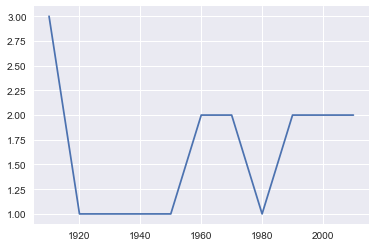

In [51]:
g = df_Hamlet.groupby('decade')

plt.plot(list(g.count().index),list(g.count().title.values))
plt.show()

In [170]:
#6

In [52]:
df_leading_roles = df.loc[df['n'] == 1]

leading_actors = df_leading_roles.loc[df_leading_roles['type'] == 'actor']
leading_actresses = df_leading_roles.loc[df_leading_roles['type'] == 'actress']

g1 = leading_actors.groupby('decade').get_group(1950).groupby('year')
g2 = leading_actresses.groupby('decade').get_group(1950).groupby('year')

In [53]:
print("for actors: ")
g1.count().title

for actors: 


year
1950    604
1951    633
1952    591
1953    634
1954    626
1955    606
1956    614
1957    708
1958    694
1959    678
Name: title, dtype: int64

In [54]:
print("for actresses: ")
g2.count().title

for actresses: 


year
1950    271
1951    272
1952    284
1953    290
1954    298
1955    264
1956    288
1957    284
1958    275
1959    287
Name: title, dtype: int64

In [212]:
#7

In [78]:
df_leading_roles_since_1990 = df_leading_roles.loc[df_leading_roles['year'] >= 1990]

g3 = df_leading_roles_since_1990.groupby('name')

list(g3.count().nlargest(columns = ['title'], n = 10).index)

['Mohanlal',
 'Mammootty',
 'Akshay Kumar',
 'Jayaram',
 'Andy Lau',
 'Ajay Devgn',
 'Amitabh Bachchan',
 'Eric Roberts',
 'Nagarjuna Akkineni',
 'Dilip']

In [77]:
#8

In [81]:
q = df.loc[df['name'] == "Frank Oz"].groupby('year').count()
list(q.loc[q['title'] > 1].index)

[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1992, 1996, 1999, 2005]